In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Theory 

Suppose we need to find a root of a continuous differentiable function f(x), and we know the root is somewhere near the point $x = x_{0}$.  Newton's method tells us that a better approximation for the function is :

$x_{1} = x_{0} - \frac{f(x_{0})}{f'(x_{0})}$

We can repeat this process as many times as necessary to get the desired accuracy we want.  In general, for any x-value $x_{n}$, the next value is given by:

$x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$

The Newton-Raphson method is used for solving numerical optimization problems.  In this case, the method takes the form of Newton's method for finding the zeros of a function, but applied to the derivative of the function.  This is because determining the minimum point of the function `f` is equivalent to determining the root of the first derivative `f'`.  In this case, the update formula is:

$x_{n+1} = x_{n} - \frac{f'(x_{n})}{f''(x_{n})}$

### Newton-Raphson Test on a Function 

So let's see how it works on a function.  Suppose we have the following function: 

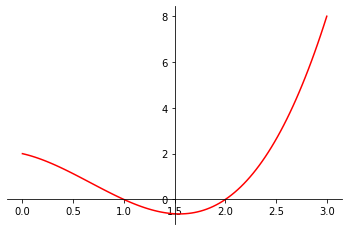

In [3]:
# Define a non-linear function
x = np.linspace(0, 3, 100)
y = x**3 - 2*x**2 - x + 2

fig = plt.figure()
axdef = fig.add_subplot(1, 1, 1)
axdef.spines['left'].set_position('center')
axdef.spines['bottom'].set_position('zero')
axdef.spines['right'].set_color('none')
axdef.spines['top'].set_color('none')
axdef.xaxis.set_ticks_position('bottom')
axdef.yaxis.set_ticks_position('left')
plt.plot(x, y, 'r')
plt.show()

We see here that the minimum of the function is somewhere around x = 1.5, but we aren't exactly sure where.  Since we can cheat and use computational methods here, let's go ahead and check what the minimum **really** is:

In [5]:
# Actual minimum
x[np.argmin(y)]

1.5454545454545454

So the minimum is actually a little bit above 1.5.  Let us now define two functions representing the first and second derivatives of our function: 

In [6]:
# First and second derivative functions
first_derivative = lambda x: 3*x**2 - 4*x - 1
second_derivative = lambda x: 6*x - 4

Now let's initialize the following parameters: 

- `actual_x`: Contains the current value of the independent variable x.  We initialize at x=3 to start outside our min value.
- `precision_value`: Contains the value that defines the degree of precision for our algorithm.  Since this procedure is iterative, the solution is refined at each iteration and tends to converge.  But we may need many iterations, so to save resources, we stop the procedure once the specified precision has been reached. 
- `previous_step_size`: Contains the calculation of the precision and is initialized to 1.
- `max_iteration`: Contains the maximum number of iterations that we have provided to our algorithm.  We use this to stop the procedure if it doesn't converge. 
- `iteration_counter`: Counts how many iterations there have been. 

In [7]:
# Parameters
actual_x = 3
precision_value = 0.000001
previous_step_size = 1
max_iteration = 10000
iteration_counter = 0

Now let's apply the Newton-Raphson method: 

In [8]:
# Newton-Raphson method
while previous_step_size > precision_value and iteration_counter < max_iteration:
    previous_x = actual_x
    actual_x = actual_x - first_derivative(previous_x) / second_derivative(previous_x)
    previous_step_size = abs(actual_x - previous_x)
    iteration_counter += 1
    print(f'Num iterations = {iteration_counter}')
    print(f'Actual value of x = {actual_x}')

Num iterations = 1
Actual value of x = 2.0
Num iterations = 2
Actual value of x = 1.625
Num iterations = 3
Actual value of x = 1.5516304347826086
Num iterations = 4
Actual value of x = 1.5485890147300967
Num iterations = 5
Actual value of x = 1.5485837703704566
Num iterations = 6
Actual value of x = 1.5485837703548635


Wow! We were able to achieve a solution in only 6 iterations.  This is significantly faster than gradient descent for this function.  The reason for this is based upon mathematical properties of the functions we are trying to optimize.  While approximating f', Newton's method makes use of f'' (the curvature of f). This means it has higher requirements on the smoothness of f, but it also means that (by using more information) it often converges faster.